SVM (Support Vector Machines) to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 

Load the Cancer data
The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:
Field name	Description
ID	Clump thickness
Clump	Clump thickness
UnifSize	Uniformity of cell size
UnifShape	Uniformity of cell shape
MargAdh	Marginal adhesion
SingEpiSize	Single epithelial cell size
BareNuc	Bare nuclei
BlandChrom	Bland chromatin
NormNucl	Normal nucleoli
Mit	Mitoses
Class	Benign or malignant



In [34]:
cell_df=pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

Lets look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

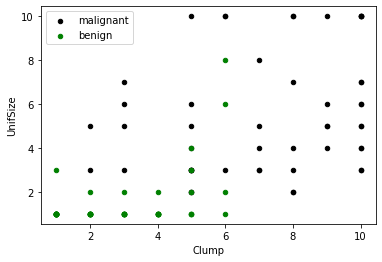

In [35]:
ax=cell_df[cell_df['Class']==4][0:50].plot(kind="scatter",x="Clump",y="UnifSize",color="black",label="malignant")
cell_df[cell_df['Class']==2][0:50].plot(kind="scatter",x="Clump",y="UnifSize",color="green",label="benign",ax=ax)


In [36]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

It looks like the BareNuc column includes some values that are not numerical. We can drop those rows:

In [37]:
cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'],errors="coerce").notnull()]
cell_df['BareNuc']=cell_df['BareNuc'].astype("int")
cell_df['BareNuc'].dtypes

dtype('int32')

In [38]:
features_df=cell_df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]
x=np.asanyarray(features_df)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

We want the model to predict the value of Class (that is, benign (=2) or malignant (=4)). As this field can have one of only two possible values, we need to change its measurement level to reflect this.

In [39]:
y=np.asanyarray(cell_df["Class"])
y[0:7]

array([2, 2, 2, 2, 2, 4, 2], dtype=int64)

Modeling (SVM with Scikit-learn)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
print("train set:",x_train.shape,y_train.shape)
print("test set:",x_test.shape,y_test.shape)

train set: (478, 9) (478,)
test set: (205, 9) (205,)


In [41]:
from sklearn import svm
clf=svm.SVC(kernel="rbf")
clf.fit(x_train,y_train)


SVC()

In [49]:
yhat=clf.predict(x_test)
yhat[0:7]

array([2, 4, 2, 4, 2, 2, 2], dtype=int64)

from sklearn.metrics import f1_score
f1_score(y_test,yhat,average="weighted")

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
classification_report(y_test,yhat)

'              precision    recall  f1-score   support\n\n           2       0.98      0.92      0.95       132\n           4       0.88      0.96      0.92        73\n\n    accuracy                           0.94       205\n   macro avg       0.93      0.94      0.93       205\nweighted avg       0.94      0.94      0.94       205\n'

In [46]:
import seaborn as sns
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,yhat)
print(cm)

[[122  10]
 [  3  70]]


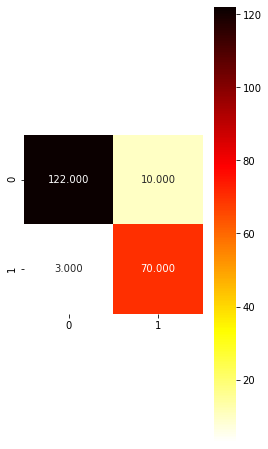

In [48]:
plt.figure(figsize=(4,8))
sns.heatmap(cm,annot=True,fmt='.3f',square=True,cmap="hot_r")
plt.show()